# Homework 1: Linear Systems Part I

## General Instructions
 
* To pass this assignment requires to complete the present Jupyter notebook by
    + providing correct answers to all the theoretical exercises, and by
    + providing complete and runnable computer code producing the correct results to all the computational problems.

* For the theoretical exercises, please include intermediate steps to
  explain how you arrive at your solution.
* Don't overengineer your code, keep it as simple and readable as possible   and provide short code comments to help other people understanding your     code.
* Please provide also a short summary and discussion of your results 
  including the requested output (e.g., tables, graphs etc.).

* Up to 3 students can jointly submit the solutions (4 students if at
  least one is an exchange student) **Only 1 student from each group** 
  is supposed to submit them.  

##### Deadline for submission of your solutions is **5th of September**.


###  Happy coding!

**And before we start:**

Executing the following cell loads a non-default css style for the notebook. 
Make sure that you download the corresponding css file  `tmas4215.css` from the `lab/styles` Blackbord folder. Note that the following code snippet assumes that the file resides inside the folder `../styles/` relative to the folder where you stored this notebook on you computer.

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("C:/Users/Emil/TMA4215/styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
#css_styling()

### Useful code snippets

We provide a few of code snippets to get you
started in Python. Three dots $\ldots$ indicate places where you have
to fill in code. We start with importing the necessary scientific libraries
and define a name alias for them.

In [38]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import time
import matplotlib.pyplot as plt

sns.set()

In [26]:
from tqdm import tqdm_notebook, tnrange

## Problem 1
Provide a complete proof of Theorem 2 from Lecture 2,
following the outline provided there. 

## Problem 2

Given matrix $A \in \mathbb{R}^{n,n}$ and $\boldsymbol{b} \in \mathbb{R}^n$,
the goal of this problem set is to compute the solution $\boldsymbol{x}$
to the linear system $A \boldsymbol{x} = \boldsymbol{b}$ numerically
by implementing the algorithms $A = LU$ factorization (whenever possible), and the backward and forward substitution steps in ```Python```.

As a preliminary step, please make sure that you have import ```numpy```  as ```np``` by executing the cell right under "Useful code snippets".

In [9]:
A1 = np.array([[1,2,4],[2,1,3],[3,2,4]])
A2 = np.array([[4,3,1],[2,1,9],[1,3,4]])
A3 = np.array([[4,3,1],[2,5,9],[1,3,4]])
#L = np.array([[1,0,0,0],[2,3,0,0],[4,5,6,0],[7,8,9,10]])
#b = np.array([3,6,7,9])




**a)** Implement a ```Python``` function ```forward_sub```:

In [10]:

def forward_sub(L, b):
    """Given a lower triangular matrix L and right-side vector b,
    compute the solution vector y solving Ly = b."""
    # ...
    y = np.zeros(len(b))
    y[0] = float(b[0])/L[0][0]
    for i in range(1, len(L), 1):
        y[i] = (b[i]-np.dot(L[i][:i], y[:i]))/L[i][i]
            
    return y

#print(forward_sub(L, b))

**b)** Next, implement a ```Python``` function ```backward_sub```:

In [11]:

def backward_sub(U, y):
    """Given a lower triangular matrix U and right-side vector y,
    compute the solution vector x solving Ux = y."""
    # ...
    x = np.zeros(len(y))
    x[-1] = float(y[-1])/U[-1][-1]
    for i in range(len(U)-2, -1, -1):
        x[i] = (y[i]-np.dot(U[i][i+1:], x[i+1:]))/U[i][i]
    return x

#print(backward_sub(np.transpose(L), b))

**c)** Now, implement a Python function which computes for a given matrix $A \boldsymbol{R}^{n,n}$ the $LU$ factorization of $A = LU$ ((if possible).
You can either base your implemenentation on the Banachiewicz or Crout method (explain in Lecture 3) or any method
you might dig up from the literature.
If you want, you can take some inspiration from the reference **YEB**, Chapter 3.3, see Program 4, 5, 6.

If the factorization fails without permutating $A$, you should at least be so kind
and raise an ```Exception```, see [Python 3 tutorial, 8. Errors and Exceptions](
https://docs.python.org/3/tutorial/errors.html#errors-and-exceptions).
More specifically, you can simply raise an [NotImplementedError](https://docs.python.org/3/library/exceptions.html#NotImplementedError) exception.

Of course, you can also implement the full $PA = LU$ decomposition if you don't want to throw Exceptions around :).

In [54]:
def lu_factor(A):
    """LU-factorization by partial pivoting, PA = LU decomposition"""
    n = len(A)
    MP_tot = np.identity(n)
    P_tot = np.identity(n)
    for i in tnrange(n-1):
        col_max = np.amax(A[i:,i])
        max_idx = np.where(A[:,i]==col_max)[0][0]
        P = np.identity(n)
        P[[i, max_idx]] = P[[max_idx, i]]
        PA = np.matmul(P, A)
        M = np.identity(n)
        M[i+1:,i] = -PA[i+1:,i]/float(PA[i][i])
        A = np.matmul(M, PA)
        
        MP_tot = np.matmul(np.matmul(M,P), MP_tot)
        P_tot = np.matmul(P, P_tot)
    U = A
    L = np.matmul(P_tot, np.linalg.inv(MP_tot))
    return L, U, P_tot

l,u,p = lu_factor(A2)
print(l)
print(u)
print(np.matmul(p,A2))
print(np.matmul(l,u))


[[ 1.          0.          0.        ]
 [ 0.25        1.          0.        ]
 [ 0.5        -0.22222222  1.        ]]
[[4.         3.         1.        ]
 [0.         2.25       3.75      ]
 [0.         0.         9.33333333]]
[[4. 3. 1.]
 [1. 3. 4.]
 [2. 1. 9.]]
[[4. 3. 1.]
 [1. 3. 4.]
 [2. 1. 9.]]


**d)** Next, combine the Python functions you just implemented in a)-b) to provide
solver for the linear system $A \boldsymbol{x} = \boldsymbol{b}$ based on
a given $A = LU$ factorization. 

In [13]:
def lu_solve(L, U, b):
    # Step 1: Solve Ly = b using forward substitution
    y = forward_sub(L, b)
    # Step 2: Solve Ux = y using backward substitution
    x = backward_sub(U, y)
    
    return x

**e)** Finally, write a ```linear_solve``` function  by simply combining your ```lu_factor``` and ```lu_solve```. 

In [55]:
def linear_solve(A, b):
    """..."""
    L, U, P = lu_factor(A)
    x = lu_solve(L, U, np.matmul(P,b))
    return x

print(linear_solve(np.array([[4,19,1],[2,1,9],[1,3,9]]), 
                   np.array([17,12,90])))

[-54.52941176  11.73529412  12.14705882]


**f)** Use you brand new `linear_solve` function to compute the solution to a non-trivial linear system. Here non-trivial means that $n > 4$ :) and a non-zero right-hand side $\boldsymbol{b}$.

*Hint*: To check whether your code computes the "exact" result, you can use the 
method of **manufactured solution**. In the case of linear systems $A \boldsymbol{x} = \boldsymbol{b}$ this means that for **given/chosen** matrix $A$ and solution vector $\boldsymbol{x}$, you simply compute the resulting right-hand side vector 
$\boldsymbol{b} = A \boldsymbol{x}$ to construct an example where you know the solution.
When you now solve $A\boldsymbol{x} = \boldsymbol{b}$ starting from $A$, $\boldsymbol{b}$, your implementation should return the correct $\boldsymbol{x}$.

## Problem 3

The objective of this problem set is two-fold. First, we will have an actual look 
at the complexity of the linear solver you implemented in the previous problem.
Second, we want to illustrate that the finite precision of real numbers
can matter very much in actual computations.

We start by introducing the **Hilbert Matrix** $H_n$ of order $n$ by
$$ 
(H_n)_{ij} = \dfrac{1}{i+j-1} \quad \text{for } 1 \leqslant i,j \leqslant n.
$$


The Hilbert matrix is readily available in the ```scipy.linalg``` module, so you simply
type, e.g

```python
n = 3
A = la.hilbert(n)
```
Recall that we imported the ```linalg``` module and renamed it to ```la``` via the
```python 
import scipy.linalg as la
``` 
line at the beginning of this notebook.

**a)** 
Define the trivial righ-hand side $\boldsymbol{b} = \boldsymbol{0}$
and measure the executation time for the various step in your linear_solver.
To do so you can use ```%timeit``` and ```%%timeit``` magic functions in IPython,
see [corresponding documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In a nutshell, ```%%timeit``` measures the executation time of an entire cell, while ```%timeit```
only measures only the executation time of a single line, e.g. as in

```python
%timeit my_function()
```

Note that the latter might not play well with functions returning arguments.
To this end, you can simply (re)write a linear solver in  3 lines (1 line per cell)
starting from calling your  ```lu_factor``` function and
copy-pasting the lines from Step 1 to Step 2 in the ```linear_solve()``` function.
Then use the ```%%timeit``` to measure the executation time of each cell.

To get accurate timeing results, ```timeit``` automatically runs the same code multiple
times in  a loop, and repeats that measurement a number of times.
The actual number of loops and repeats is selected automatically and will be printed out at the end. They can also be manually adjusted by using

```
%%timeit -n<number_of_loops> -r<number_of_repeats>
```


Now for $n = 500, 1000, 2000, 4000$, measure the executation time for each step in the linear solve
(factorizing, forward and backward substitution) and plot
the execution time $t$ against the number of unknowns $n$ in a $\log$-$\log$ plot,
that is, $\log(t)$ against $\log(n)$.
(Matplotlib has specific functions for log-log plotting)

In [58]:
n = 500
A = la.hilbert(n)
b = np.zeros(n)


In [ ]:
L, U, P = lu_factor(A)
y = forward_sub(L, b)
x = backward_sub(U, y)

In [32]:
%%timeit -n1 -r1 -o
L, U, P = lu_factor(A)

res_lu = _

KeyboardInterrupt: 

In [64]:
A = la.hilbert(500)

In [65]:
%%timeit
la.lu_factor(A)

The slowest run took 5.65 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 4.76 ms per loop


In [66]:
A = la.hilbert(1000)    

In [67]:
%%timeit
la.lu_factor(A)

10 loops, best of 3: 33.4 ms per loop


In [68]:
A = la.hilbert(2000)

In [69]:
%%timeit
la.lu_factor(A)

10 loops, best of 3: 163 ms per loop


In [70]:
A = la.hilbert(4000)

In [71]:
%%timeit
la.lu_factor(A)

1 loop, best of 3: 1.19 s per loop


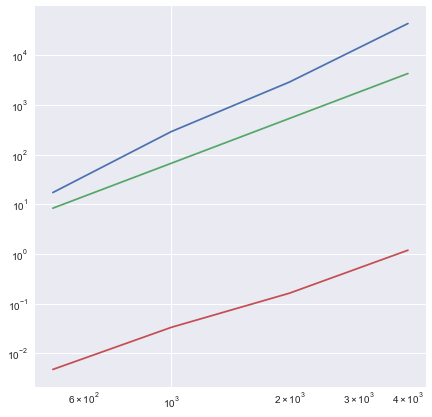

In [72]:
    #time_lu=[483*10**-6, 1070*10**-6, 4410*10**-6, 21500*10**-6, 233000*10**-6]
time_lu = [17.2, 289, 2880, 43200]
n_list = [500, 1000, 2000, 4000]
time_lu2 = [(2/3.0)*10**(-7)*n**3 for n in n_list]
time_lu_scipy = [4.76*10**(-3), 33.4*10**(-3), 0.163, 1.19]
f, ax = plt.subplots(figsize=(7, 7))

plt.loglog(n_list, time_lu)
plt.loglog(n_list, time_lu2)
plt.loglog(n_list, time_lu_scipy)
plt.show()



In [ ]:
%%timeit -n100 -o
forward_sub(L, b)
res_forw = _

In [ ]:
%%timeit -n100 -o
backward_sub(U, y)
res_backw = _ 

In [ ]:
lu, piv = la.lu_factor(A)
%timeit la.lu_solve((lu, piv), b)

**b)** Next, define a non-trivial vector $\boldsymbol{b}$ by
$$
b_i = \sum_{j=1}^n (j/(i+j-1)) 
$$
so that the **exact solution** to the lineary system $H_n \boldsymbol{x} = \boldsymbol{b}$ is
the vector $\boldsymbol{x}_{\mathrm{ex}}$  with elements $x_{\mathrm{ex},i} = i$.
Now solve the system using your ```linear_solve``` function for $n = 2, 4, 8, 16$, print the computed solution vector $\boldsymbol{x}_{\mathrm{comp}}$ and compare it with $\boldsymbol{x}_{\mathrm{ex}}$. In particular compute 

$$\|\boldsymbol{x}_{\mathrm{ex}}-\boldsymbol{x}_{\mathrm{comp}}\|_2.$$

What do you observe? Can you explain your observations?

*Hint*: It can be shown that the condition number $\kappa_2(H_n)$ scales like
$$
\kappa_2(H_n) \sim \dfrac{\left(\sqrt{2}+1\right)^{4n+4}}{2^{15/4}\sqrt{\pi n}}
\text{as } n \to  \infty.
$$

Tabulate the approximate values of $\kappa_2(H_n)$ for $n = 2, 4, 8, 16$.

This exercise was heavily inspired by Section 2.8 in **BLUB**.

In [ ]:
def create_b(size):
    b = np.zeros(size)
    for i in range(size):
        for j in range(1, size+1, 1):
            b[i] += j/(i+1+j-1)
    return b

In [ ]:
sizes = [2, 4, 8, 16]
dif_norm = []
cond_numb = []
for n in sizes:
    H = la.hilbert(n)
    b = create_b(n)
    x_comp = linear_solve(H, b)
    print(x_comp)
    x_ex = np.array([i+1 for i in range(n)]) 
    dif_norm.append(np.linalg.norm(x_ex-x_comp))
    cond_numb.append((2**0.5+1)**(4*n+4)/(2**(15/4)*(np.pi*n)**0.5))

print(dif_norm)
print(cond_numb)